In [ ]:
import cv2
import numpy as np
from skimage.filters import gaussian, gabor
from skimage import exposure, img_as_float

ModuleNotFoundError: No module named 'model_dl'

In [138]:
def load_image(path):
    img=cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"Unable to load image at {path}")
    return img

In [139]:
def resize_and_crop(img, size=128):
    h, w = img.shape[:2]
    scale = size / min(h, w)
    resized = cv2.resize(img, (int(w*scale), int(h*scale)))
    h2, w2 = resized.shape[:2]
    top = (h2 - size)//2
    left = (w2 - size)//2
    cropped = resized[top:top+size, left:left+size]
    return cropped

def channels_first_tranform(image):
    return image.transpose(2, 0, 1)

def remove_green_pixels(image):
    channels_first = channels_first_tranform(image)
    r_channel = channels_first[0]
    g_channel = channels_first[1]
    b_channel = channels_first[2]
    mask = False == np.multiply(g_channel > r_channel, g_channel > b_channel)
    channels_first = np.multiply(channels_first, mask)
    image = channels_first.transpose(1, 2, 0)
    return image

def to_grayscale(img):
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

def remove_noise(img, method="gaussian", sigma=1):
    return gaussian(img, sigma=sigma)

def clahe_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
    return clahe.apply((img * 255).astype(np.uint8))

def apply_gabor(img, frequency=0.6):
    img_float = img_as_float(img)
    gabor_img, _ = gabor(img_float, frequency=frequency)
    return gabor_img

# def equalize_contrast(img):
#     eq=exposure.equalize_hist(img)
#     return eq

def normalize(img):
    return img.astype(np.float32) / 255.0

In [140]:
def preprocess_image(path, size=128):
    img=load_image(path)
    img=resize_and_crop(img, size)
    img=remove_green_pixels(img)
    img=to_grayscale(img)
    # img=remove_noise(img, sigma=1)
    img=clahe_contrast(img)
    # img=apply_gabor(img)
    return normalize(img)

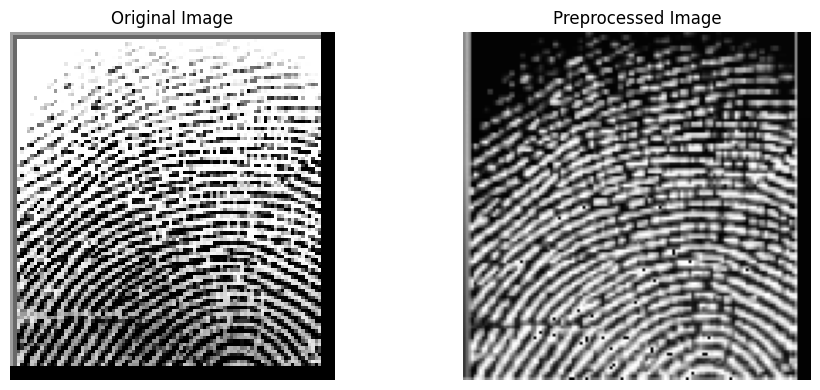

In [141]:
import matplotlib.pyplot as plt
import cv2

# Step 1: Load image
img = cv2.imread('../../dataset/dataset_blood_group/A+/cluster_0_62.bmp')  # Use a fingerprint image path

# Step 2: Apply your preprocessing
processed_img = preprocess_image('../../dataset/dataset_blood_group/A+/cluster_0_62.bmp')  # Your function

# Step 3: Visualize original vs processed
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Preprocessed Image")
plt.imshow(processed_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
